In [1]:
!git clone https://github.com/JoshSahni/CNN-Classifier.git
#cd VGG16_Model

Cloning into 'CNN-Classifier'...
remote: Enumerating objects: 2741, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 2741 (delta 47), reused 0 (delta 0), pack-reused 2693 (from 1)
Receiving objects: 100% (2741/2741), 359.51 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Updating files: 100% (1773/1773), done.


In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
training_path = "/content/CNN-Classifier/Pnemonia dataset/train"

data_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2,
      fill_mode='nearest')

training_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="training",)
validation_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="validation",)
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

base_model.trainable = False

Found 1168 images belonging to 2 classes.
Found 291 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(training_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 747ms/step - accuracy: 0.8302 - loss: 0.9476 - val_accuracy: 0.8591 - val_loss: 0.7820
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 628ms/step - accuracy: 0.8587 - loss: 0.7973 - val_accuracy: 0.8763 - val_loss: 0.7552
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 633ms/step - accuracy: 0.8973 - loss: 0.7181 - val_accuracy: 0.9107 - val_loss: 0.7060
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 632ms/step - accuracy: 0.9012 - loss: 0.7235 - val_accuracy: 0.8832 - val_loss: 0.7161
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 636ms/step - accuracy: 0.8992 - loss: 0.7024 - val_accuracy: 0.8969 - val_loss: 0.6996
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 627ms/step - accuracy: 0.9187 - loss: 0.6787 - val_accuracy: 0.9210 - val_loss: 0.6814
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 649ms/step - accuracy: 0.9187 - loss: 0.6534 - val_accuracy: 0.9107 - val_loss: 0.6611
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 633ms/step - accuracy: 0.9224 - loss: 0.6575 - val_accuracy: 0.924

In [5]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

hist = model.fit(training_generator,
                    epochs=40,
                    validation_data=validation_generator,
                    callbacks=[stopping])

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 698ms/step - accuracy: 0.9294 - loss: 0.6196 - val_accuracy: 0.9381 - val_loss: 0.6003
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 633ms/step - accuracy: 0.9434 - loss: 0.5523 - val_accuracy: 0.9416 - val_loss: 0.5777
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 635ms/step - accuracy: 0.9539 - loss: 0.5410 - val_accuracy: 0.9244 - val_loss: 0.6141
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 633ms/step - accuracy: 0.9594 - loss: 0.5377 - val_accuracy: 0.8797 - val_loss: 0.7463
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 634ms/step - accuracy: 0.9622 - loss: 0.5350 - val_accuracy: 0.9588 - val_loss: 0.5360
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 626ms/step - accuracy: 0.9601 - loss: 0.5438 - val_accuracy: 0.9347 - val_loss: 0.5423
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 628ms/step - accuracy: 0.9640 - loss: 0.5222 - val_accuracy: 0.9553 - val_loss: 0.5394
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 641ms/step - accuracy: 0.9567 - loss: 0.5375 - val_accu

In [6]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

avg_training_accuracy = sum(training_accuracy) / len(training_accuracy)
avg_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
difference = avg_training_accuracy - avg_validation_accuracy

avg_training_loss = sum(training_loss) / len(training_loss)
avg_validation_loss = sum(validation_loss) / len(validation_loss)

print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_validation_accuracy:.4f}")
print(f"Difference: {difference:.4f}")

print(f"Average Training loss: {avg_training_loss:.4f}")
print(f"Average Validation loss: {avg_validation_loss:.4f}")

Average Training Accuracy: 0.9242
Average Validation Accuracy: 0.9155
Difference: 0.0087
Average Training loss: 0.6480
Average Validation loss: 0.6537


In [7]:
history.history['accuracy'].extend(hist.history['accuracy'])
history.history['val_accuracy'].extend(hist.history['val_accuracy'])
history.history['loss'].extend(hist.history['loss'])
history.history['val_loss'].extend(hist.history['val_loss'])

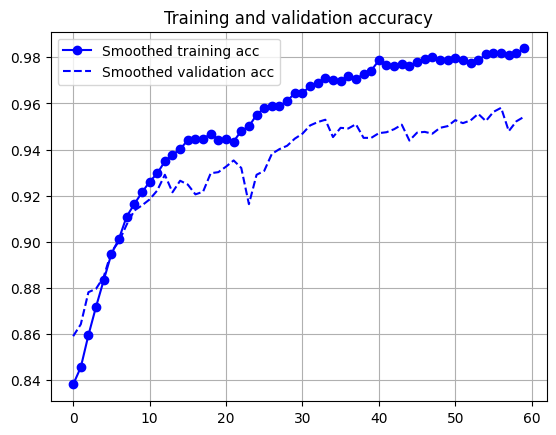

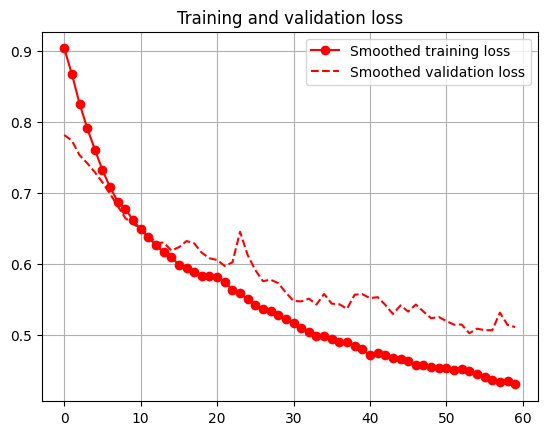

In [8]:
def smooth_curve(points, factor=0.7):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point * (1 - factor))
        else:
            smooth_points.append(point)
    return smooth_points

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,
         smooth_curve(acc), 'bo-', markersize=6, label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(validation_acc), 'b--', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'ro-', markersize=6, label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(validation_loss), 'r--', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
testing_path = "/content/CNN-Classifier/Pnemonia dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        testing_path,
        target_size=(256, 256),
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

model.save('VGG16.keras')

Found 310 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step - accuracy: 0.8682 - loss: 0.8539
test acc: 0.8806451559066772
